In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bridge_data_msr', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'c

In [ ]:
(ds_train,ds_test),ds_info=tfds.load('mnist',split=['train','test'],as_supervised=True,with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize_image(image,label):
  image = tf.cast(image,tf.float32)/255.0
  return tf.reshape(image,[28,28]),label
  #Apply normalisation
ds_train = ds_train.map(normalize_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape=(28,28)),
    layers.SimpleRNN(128,activation='tanh'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,386 (83.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(ds_train,epochs=5,validation_data=ds_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8188 - loss: 0.5781 - val_accuracy: 0.9316 - val_loss: 0.2390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9366 - loss: 0.2159 - val_accuracy: 0.9484 - val_loss: 0.1746
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9514 - loss: 0.1691 - val_accuracy: 0.9645 - val_loss: 0.1223
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 21ms/step - accuracy: 0.9550 - loss: 0.1586 - val_accuracy: 0.9612 - val_loss: 0.1381
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9590 - loss: 0.1466 - val_accuracy: 0.9525 - val_loss: 0.1643


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


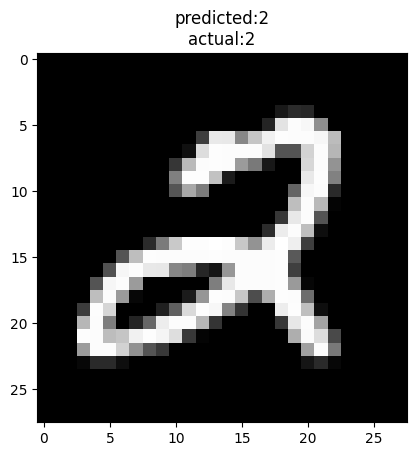

In [ ]:
for images,labels in ds_test.take(1):
  predictions = model.predict(images)
  plt.imshow(images[0],cmap='gray')
  plt .title(f'predicted:{np.argmax(predictions[0])}\nactual:{labels[0].numpy()}')
  plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2024-09-25 11:29:09--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2024-09-25 11:29:09 (36.6 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [ ]:
import pandas as pd
data = pd.read_csv('airline-passengers.csv',usecols=[1])
data = data.values.astype('float32')
data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

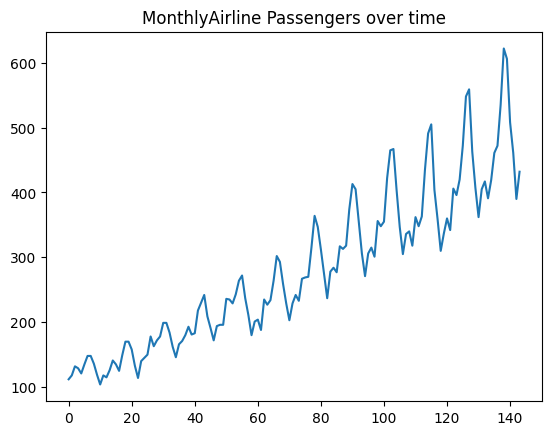

In [ ]:
plt.plot(data)
plt.title('MonthlyAirline Passengers over time')
plt.show()

In [ ]:
def create_sequence(sata,seq_len):
  X=[]
  y=[]
  for i in range(len(data)-seq_len):
    X.append(data[i:i+seq_len])
    y.append(data[i+seq_len])
  return np.array(X),np.array(y)

In [ ]:
seq_length=12
X,y=create_sequence(data,seq_length)
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [ ]:
X

array([[[112.],
        [118.],
        [132.],
        ...,
        [119.],
        [104.],
        [118.]],

       [[118.],
        [132.],
        [129.],
        ...,
        [104.],
        [118.],
        [115.]],

       [[132.],
        [129.],
        [121.],
        ...,
        [118.],
        [115.],
        [126.]],

       ...,

       [[407.],
        [362.],
        [405.],
        ...,
        [622.],
        [606.],
        [508.]],

       [[362.],
        [405.],
        [417.],
        ...,
        [606.],
        [508.],
        [461.]],

       [[405.],
        [417.],
        [391.],
        ...,
        [508.],
        [461.],
        [390.]]], dtype=float32)

In [ ]:
train_size = int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [ ]:
model = tf.keras.Sequential([

    layers.SimpleRNN(50,activation='tanh',input_shape=(seq_length,1)),
    layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 78547.3906 - val_loss: 197826.4375
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74240.5703 - val_loss: 197516.3750
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74462.7344 - val_loss: 197204.6094
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 70348.7109 - val_loss: 196905.2656
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 70143.0156 - val_loss: 196549.2812
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 78837.6562 - val_loss: 195866.6250
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72809.6016 - val_loss: 195500.3750
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72534.8438 - val_loss: 195165.8594
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71164.2422 - val_loss: 194500.8906
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 67839.8984 - val_loss: 194185.5781
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 68369.6484 - val_loss: 19

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Loss:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 191143.0625
Loss: 191143.0625


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


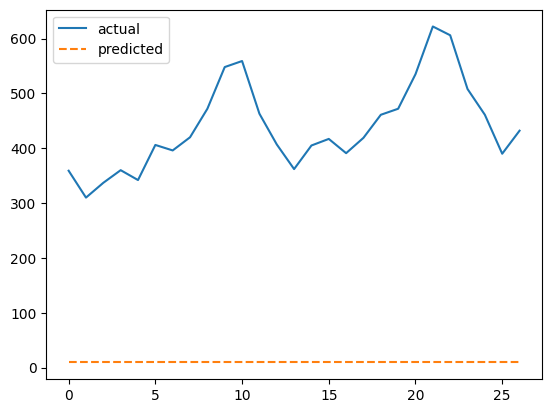

In [ ]:
predictions = model.predict(X_test)
plt.plot(y_test,label='actual')
plt.plot(predictions,label='predicted',linestyle='--')
plt.legend()
plt.show()

In [ ]:
last_sequence= data[-seq_length:]
last_sequence=np.reshape(last_sequence,(1,seq_length,1))
next_value_prediction = model.predict(last_sequence)
print("Next value prediction",next_value_prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Next value prediction 9.385647
